In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libaries to help with Model Building
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
#loading data
df = pd.read_csv('rainfaLLIndia.csv') 

In [3]:
df.shape

(4332, 7)

In [4]:
df.head()

,subdivision,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
0,ANDAMAN & NICOBAR ISLAND,1901,517.5,365.1,481.1,332.6,1696.3
1,ANDAMAN & NICOBAR ISLAND,1902,537.1,228.9,753.7,666.2,2185.9
2,ANDAMAN & NICOBAR ISLAND,1903,479.9,728.4,326.7,339.0,1874.0
3,ANDAMAN & NICOBAR ISLAND,1904,495.1,502.0,160.1,820.4,1977.6
4,ANDAMAN & NICOBAR ISLAND,1905,628.7,368.7,330.5,297.0,1624.9


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subdivision  4332 non-null   object 
 1   YEAR         4332 non-null   int64  
 2   JUN          4332 non-null   float64
 3   JUL          4332 non-null   float64
 4   AUG          4332 non-null   float64
 5   SEP          4332 non-null   float64
 6   JUN-SEP      4332 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 237.0+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
# let's check for missing values in the data
df.isnull().sum()

subdivision    0
YEAR           0
JUN            0
JUL            0
AUG            0
SEP            0
JUN-SEP        0
dtype: int64

In [8]:
df.nunique()

subdivision      36
YEAR            121
JUN            2824
JUL            3159
AUG            3040
SEP            2740
JUN-SEP        3874
dtype: int64

In [9]:
print(df['subdivision'].unique())

['ANDAMAN & NICOBAR ISLAND' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGALAND, MANIPUR, MIZORAM, TRIPURA' 'SUB HIMALAYAN W.BENGAL & SIKKIM'
 'GANGETIC W.BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARANCHAL' 'HARYANA, DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MARATHWADA'
 'VIDARBHA' 'CHATHISGARH' 'COASTAL ANDHRA PRADESH & YANAM' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU, PUDUCHERRY & KARAIKAL' 'COASTAL KARNATAKA'
 'NORTH INTERIOR KARNATAKA' 'SOUTH INTERIOR KARNATAKA' 'KERALA & MAHE'
 'LAKSHDWEEP']


In [10]:
jun_sep_range = df['JUN-SEP'].describe()['max'] - df['JUN-SEP'].describe()['min']
print("The range of values in the JUN-SEP column is:", jun_sep_range)
print(df['JUN-SEP'].describe()['min'])
print(df['JUN-SEP'].describe()['max'])

The range of values in the JUN-SEP column is: 4636.799999999999
-99.9
4536.9


In [11]:
# find the mean of the JUN-SEP column
from statistics import mode
mean = df['JUN-SEP'].mean()
print("Mean:", mean)

# find the median of the JUN-SEP column
median = df['JUN-SEP'].median()
print("Median:", median)

# find the mode of the JUN-SEP column
mode_value = mode(df['JUN-SEP'])
print("Mode:", mode_value)

Mean: 1057.105216989843
Median: 877.3
Mode: -99.9


In [12]:
print(df['YEAR'].unique())

[1901 1902 1903 1904 1905 1906 1907 1908 1910 1911 1912 1913 1914 1915
 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929
 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1946
 1947 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 1943 1944 1945 1948 1909]


Data is clean Now we will Encode categorical variables


In [13]:
# Preprocess the data
le = LabelEncoder()
df['subdivision'] = le.fit_transform(df['subdivision'])

In [14]:
# Data Preperation 
X = df.drop(['JUN-SEP'], axis=1).values
y = df['JUN-SEP'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Building ANN

# Define the ANN model
model = Sequential()
model.add(Dense(units=256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# Define the early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/500
109/109 [==============================] - 1s 2ms/step - loss: 1098073.1250 - val_loss: 102078.9766
Epoch 2/500
109/109 [==============================] - 0s 1ms/step - loss: 77366.8672 - val_loss: 29000.9180
Epoch 3/500
109/109 [==============================] - 0s 2ms/step - loss: 44728.2070 - val_loss: 15994.9434
Epoch 4/500
109/109 [==============================] - 0s 1ms/step - loss: 36045.3398 - val_loss: 11798.8223
Epoch 5/500
109/109 [==============================] - 0s 2ms/step - loss: 30795.1152 - val_loss: 6435.4629
Epoch 6/500
109/109 [==============================] - 0s 1ms/step - loss: 26409.5176 - val_loss: 6122.3301
Epoch 7/500
109/109 [==============================] - 0s 1ms/step - loss: 25889.7930 - val_loss: 3111.5991
Epoch 8/500
109/109 [==============================] - 0s 1ms/step - loss: 22068.4121 - val_loss: 3255.7559
Epoch 9/500
109/109 [==============================] - 0s 2ms/step - loss: 22744.2324 - val_loss: 2886.3269
Epoch 10/500
109/109 

In [19]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
mae = np.mean(np.abs(y_test - y_pred))
print("MSE:", mse)
print("MAE:", mae)

MSE: 980418.3006043726
MAE: 734.5194410259802


In [20]:
# Classify the rainfall
low_rainfall = y.mean() - y.std()
high_rainfall = y.mean() + y.std()
y_pred_class = np.where(y_pred < low_rainfall, 'low',
                        np.where(y_pred > high_rainfall, 'high', 'moderate'))
y_test_class = np.where(y_test < low_rainfall, 'low',
                        np.where(y_test > high_rainfall, 'high', 'moderate'))

In [21]:
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 99.08%


In [22]:
# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

        high       0.99      1.00      1.00       130
         low       0.90      0.98      0.94        56
    moderate       1.00      0.99      0.99       681

    accuracy                           0.99       867
   macro avg       0.96      0.99      0.98       867
weighted avg       0.99      0.99      0.99       867



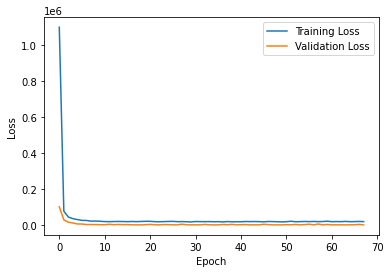

In [23]:
# Visualize the training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

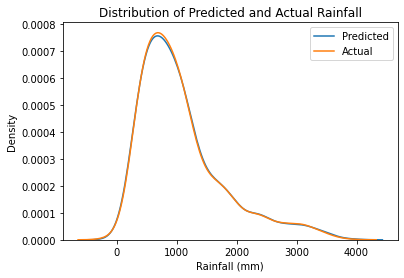

In [24]:
# Visualize the distribution of predicted and actual rainfall
sns.kdeplot(y_pred.flatten(), label='Predicted')
sns.kdeplot(y_test, label='Actual')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Density')
plt.title('Distribution of Predicted and Actual Rainfall')
plt.legend()
plt.show()

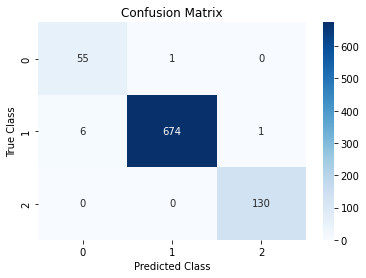

In [25]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class, labels=['low', 'moderate', 'high'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()